### RNN Sequential model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats

In [2]:
df = pd.read_csv('cumulative_final.csv')

In [3]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['action'])
df.head()

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,...,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,action,label
0,88.562267,724.668377,76.920197,701.279743,93.534148,740.639009,88.236137,684.570550,88.562267,88.562267,...,496.243334,721.868215,494.971538,662.846904,628.014079,708.712978,634.165572,651.233892,walking,3
1,93.051570,727.495574,81.841070,701.667541,97.973295,746.697862,93.905751,689.764569,93.051570,93.051570,...,499.121629,728.208774,492.833920,675.424337,634.003899,720.472129,644.226322,650.533208,walking,3
2,99.153033,735.348994,91.088184,710.526453,104.283112,753.286428,98.869878,696.530765,99.153033,99.153033,...,509.539652,738.757086,506.609583,682.912296,650.067908,725.290301,650.155304,662.962007,walking,3
3,111.768307,738.451703,102.766483,714.518439,114.444321,756.820146,110.629858,704.160144,111.768307,111.768307,...,518.921258,745.716152,518.749265,688.604398,654.276699,735.862199,659.860183,672.890801,walking,3
4,115.759422,741.244884,103.666712,718.555597,117.691903,761.409648,118.268761,704.773193,115.759422,115.759422,...,518.847756,749.429972,517.074658,688.008109,651.872229,742.211890,657.918275,680.886180,walking,3


In [4]:
x = df[['nose_x', 'nose_y', 'leftEye_x', 'leftEye_y', 'rightEye_x',
       'rightEye_y', 'leftEar_x', 'leftEar_y', 'rightEar_x', 'rightEar_y',
       'leftShoulder_x', 'leftShoulder_y', 'rightShoulder_x',
       'rightShoulder_y', 'leftElbow_x', 'leftElbow_y', 'rightElbow_x',
       'rightElbow_y', 'leftWrist_x', 'leftWrist_y', 'rightWrist_x',
       'rightWrist_y', 'leftHip_x', 'leftHip_y', 'rightHip_x', 'rightHip_y',
       'leftKnee_x', 'leftKnee_y', 'rightKnee_x', 'rightKnee_y', 'leftAnkle_x',
       'leftAnkle_y', 'rightAnkle_x', 'rightAnkle_y']]

y = df['label']

scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data = x, columns = ['nose_x', 'nose_y', 'leftEye_x', 'leftEye_y', 'rightEye_x',
       'rightEye_y', 'leftEar_x', 'leftEar_y', 'rightEar_x', 'rightEar_y',
       'leftShoulder_x', 'leftShoulder_y', 'rightShoulder_x',
       'rightShoulder_y', 'leftElbow_x', 'leftElbow_y', 'rightElbow_x',
       'rightElbow_y', 'leftWrist_x', 'leftWrist_y', 'rightWrist_x',
       'rightWrist_y', 'leftHip_x', 'leftHip_y', 'rightHip_x', 'rightHip_y',
       'leftKnee_x', 'leftKnee_y', 'rightKnee_x', 'rightKnee_y', 'leftAnkle_x',
       'leftAnkle_y', 'rightAnkle_x', 'rightAnkle_y'])
scaled_x['label'] = y.values
 
scaled_x.head()

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,...,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,label
0,-0.765450,1.526952,-0.806479,1.455903,-0.658560,1.591404,-0.709615,1.450961,-0.765450,-0.765450,...,1.668393,1.559720,1.832035,1.594451,1.723926,1.724502,1.778478,1.820009,1.681877,3
1,-0.722050,1.539947,-0.759153,1.457689,-0.613993,1.619602,-0.650847,1.475475,-0.722050,-0.722050,...,1.713600,1.585165,1.864385,1.575495,1.789315,1.766757,1.837833,1.891217,1.678281,3
2,-0.663065,1.576044,-0.670220,1.498475,-0.550646,1.650265,-0.599391,1.507409,-0.663065,-0.663065,...,1.763135,1.677263,1.918204,1.697655,1.828244,1.880079,1.862153,1.933181,1.742073,3
3,-0.541109,1.590305,-0.557906,1.516854,-0.448632,1.666711,-0.477492,1.543417,-0.541109,-0.541109,...,1.761121,1.760199,1.953710,1.805308,1.857837,1.909770,1.915515,2.001870,1.793034,3
4,-0.502526,1.603143,-0.549248,1.535441,-0.416028,1.688071,-0.398311,1.546310,-0.502526,-0.502526,...,1.819309,1.759549,1.972658,1.790458,1.854737,1.892808,1.947565,1.988126,1.834072,3


In [5]:
fps = 30
frame_size = fps*4
hop_size = fps*2

In [6]:
def get_frames(df, frame_size, hop_size):
    features = 34
    
    frames = []
    labels = []
    for i in range (0,len(df) - frame_size, hop_size):
        nose_x = df['nose_x'].values[i: i + frame_size]
        nose_y = df['nose_y'].values[i: i + frame_size]
        leftEye_x = df['leftEye_x'].values[i: i + frame_size]
        leftEye_y = df['leftEye_y'].values[i: i + frame_size]
        rightEye_x = df['rightEye_x'].values[i: i + frame_size]
        rightEye_y = df['rightEye_y'].values[i: i + frame_size]
        leftEar_x = df['leftEar_x'].values[i: i + frame_size]
        leftEar_y = df['leftEar_y'].values[i: i + frame_size]
        rightEar_x = df['rightEar_x'].values[i: i + frame_size]
        rightEar_y = df['rightEar_y'].values[i: i + frame_size]
        leftShoulder_x = df['leftShoulder_x'].values[i: i + frame_size]
        leftShoulder_y = df['leftShoulder_y'].values[i: i + frame_size]
        rightShoulder_x = df['rightShoulder_x'].values[i: i + frame_size]
        rightShoulder_y = df['rightShoulder_y'].values[i: i + frame_size]
        leftElbow_x = df['leftElbow_x'].values[i: i + frame_size]
        leftElbow_y = df['leftElbow_y'].values[i: i + frame_size]
        rightElbow_x = df['rightElbow_x'].values[i: i + frame_size]
        rightElbow_y = df['rightElbow_y'].values[i: i + frame_size]
        leftWrist_x = df['leftWrist_x'].values[i: i + frame_size]
        leftWrist_y = df['leftWrist_y'].values[i: i + frame_size]
        rightWrist_x = df['rightWrist_x'].values[i: i + frame_size]
        rightWrist_y = df['rightWrist_y'].values[i: i + frame_size]
        leftHip_x = df['leftHip_x'].values[i: i + frame_size]
        leftHip_y = df['leftHip_y'].values[i: i + frame_size]
        rightHip_x = df['rightHip_x'].values[i: i + frame_size]
        rightHip_y = df['rightHip_y'].values[i: i + frame_size]
        leftKnee_x = df['leftKnee_x'].values[i: i + frame_size]
        leftKnee_y = df['leftKnee_y'].values[i: i + frame_size]
        rightKnee_x = df['rightKnee_x'].values[i: i + frame_size]
        rightKnee_y = df['rightKnee_y'].values[i: i + frame_size]
        leftAnkle_x = df['leftAnkle_x'].values[i: i + frame_size]
        leftAnkle_y = df['leftAnkle_y'].values[i: i + frame_size]
        rightAnkle_x = df['rightAnkle_x'].values[i: i + frame_size]
        rightAnkle_y = df['rightAnkle_y'].values[i: i + frame_size]
        
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([nose_x, nose_y, leftEye_x, leftEye_y, rightEye_x,
       rightEye_y, leftEar_x, leftEar_y, rightEar_x, rightEar_y,
       leftShoulder_x, leftShoulder_y, rightShoulder_x,
       rightShoulder_y, leftElbow_x, leftElbow_y, rightElbow_x,
       rightElbow_y, leftWrist_x, leftWrist_y, rightWrist_x,
       rightWrist_y, leftHip_x, leftHip_y, rightHip_x, rightHip_y,
       leftKnee_x, leftKnee_y, rightKnee_x, rightKnee_y, leftAnkle_x,
       leftAnkle_y, rightAnkle_x, rightAnkle_y])
        labels.append(label)
    
    frames = np.asarray(frames).reshape(-1, frame_size, features)
    labels = np.asarray(labels)
    
    return frames, labels

In [7]:
x, y = get_frames(scaled_x, frame_size, hop_size)
x.shape, y.shape

((438, 120, 34), (438,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
callbacks1 = ModelCheckpoint("RNN2.h5",save_best_only=True)
callbacks2 = EarlyStopping(monitor = 'val_acc', patience = 100, verbose = 1)
callbacks = [callbacks1, callbacks2]

In [14]:
model = Sequential()
model.add(LSTM(34, input_shape=(120,34),return_sequences=True,activation='sigmoid'))

model.add(LSTM(34,activation='sigmoid'))

model.add(Dense(64))

model.add(Dense(9,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = [x_test, y_test], epochs = 50, callbacks = callbacks)

Train on 350 samples, validate on 88 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
350/350 [==============================] - 2s 6ms/sample - loss: 2.2348 - acc: 0.1057 - val_loss: 1.8892 - val_acc: 0.2500
Epoch 2/50
350/350 [==============================] - 1s 3ms/sample - loss: 1.7269 - acc: 0.2543 - val_loss: 1.5641 - val_acc: 0.3295
Epoch 3/50
350/350 [==============================] - 1s 3ms/sample - loss: 1.4863 - acc: 0.2571 - val_loss: 1.4119 - val_acc: 0.3068
Epoch 4/50
350/350 [==============================] - 1s 3ms/sample - loss: 1.3927 - acc: 0.3000 - val_loss: 1.3483 - val_acc: 0.4318
Epoch 5/50
350/350 [==============================] - 1s 3ms/sample - loss: 1.3406 - acc: 0.4057 - val_loss: 1.3146 - val_acc: 0.4091
Epoch 6/50
350/350 [==============================] - 1s 3ms/sample - loss: 1.3033 - acc: 0.3514 - val_loss: 1.2738 - val_acc: 0.4205
Epoch 7/50
350/350 [==============================] - 1s 

In [16]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['acc'])
    plt.plot(epoch_range, history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc = 'lower right')
    plt.show()
    
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc = 'upper right')
    plt.show()

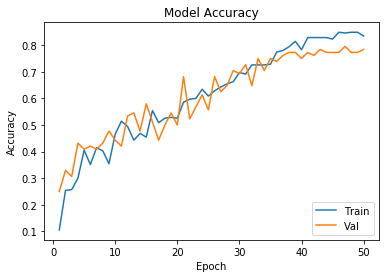

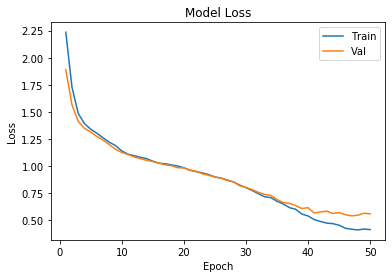

In [17]:
plot_learningCurve(history, 50)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 34)           9384      
_________________________________________________________________
lstm_1 (LSTM)                (None, 34)                9384      
_________________________________________________________________
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
Total params: 21,593
Trainable params: 21,593
Non-trainable params: 0
_________________________________________________________________


In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x247e753d808>)

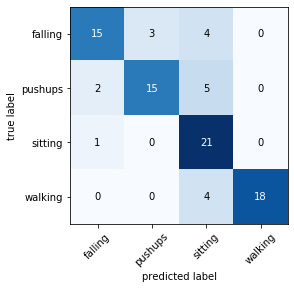

In [21]:
y_pred = model.predict_classes(x_test)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=False )

Reference:https://www.youtube.com/watch?v=swRJaqHROGk